# <center> STUDENT PERFORMANCE DATASET :

<img src="WhatsApp Image 2025-05-14 at 09.19.17_b8cbd4a6.jpg" width="100%">

# <center> INTRODUCTION :

The aim of this project is to develop a machine learning model that accurately predicts student academic performance based on various social, demographic, and academic attributes. Using the Student Performance Dataset, we explore how features such as study time, parental education, absences, and previous grades influence the final grade (G3) of students.

To achieve this, we applied multiple regression algorithms—including Decision Tree, Random Forest, XGBoost, CatBoost, and more—and evaluated their performance using common regression metrics such as MAE (Mean Absolute Error), MSE (Mean Squared Error), RMSE (Root Mean Squared Error), and R² (R-squared score).

The model with the best performance was identified, and feature importance was analyzed to determine which factors most significantly impact student success. This analysis can help educators, parents, and policymakers take data-driven actions to improve student outcomes.

# <center> About the Dataset :

The Student Performance Dataset is a real-world educational dataset collected from two Portuguese secondary schools, Gabriel Pereira and Mousinho da Silveira. It contains detailed information on 649 students enrolled in either a mathematics or Portuguese language course. The dataset was designed to explore and predict student academic performance, specifically the final grade (G3), using a wide range of attributes. These include demographic details (such as age, gender, and address), family background (parental education and job), social and personal factors (like romantic relationships, internet access, and alcohol consumption), academic support (study time, extra classes), and previous grades (G1, G2). The target variable, G3, is the final grade scored by the student, ranging from 0 to 20. This dataset is widely used for regression modeling, feature importance analysis, and educational data mining to understand how various factors influence student outcomes.

# Importing Libraries : 

In [5]:
# Loading libraries for numerical and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for scaling features
from sklearn.preprocessing import MinMaxScaler

# Regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# for evaluating models
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# To control warnings
import warnings
warnings.filterwarnings("ignore")

In [7]:
df=pd.read_csv("./Student Performance Dataset.csv")

In [8]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


# Columns in the Dataset :

In [10]:
df.size

21417

In [11]:
df.shape

(649, 33)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,649.0,16.744222,1.218138,15.0,16.0,17.0,18.0,22.0
Medu,649.0,2.514638,1.134552,0.0,2.0,2.0,4.0,4.0
Fedu,649.0,2.306626,1.099931,0.0,1.0,2.0,3.0,4.0
traveltime,649.0,1.568567,0.748660,1.0,1.0,1.0,2.0,4.0
studytime,649.0,1.930663,0.829510,1.0,1.0,2.0,2.0,4.0
failures,649.0,0.221880,0.593235,0.0,0.0,0.0,0.0,3.0
famrel,649.0,3.930663,0.955717,1.0,4.0,4.0,5.0,5.0
freetime,649.0,3.180277,1.051093,1.0,3.0,3.0,4.0,5.0
goout,649.0,3.184900,1.175766,1.0,2.0,3.0,4.0,5.0
Dalc,649.0,1.502311,0.924834,1.0,1.0,1.0,2.0,5.0


## Insight :
•	No missing data

•	Most variables are on a bounded categorical/ordinal scale (0–4 or 1–5)

•	Absences and scores are continuous and vary widely → need normalization

•	Students generally have stable home lives, moderate alcohol, and good health

In [15]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [16]:
df.duplicated().sum()

0

In [17]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

# OULIER DETECTION :

In [19]:
num_cols=df.select_dtypes(include="number")

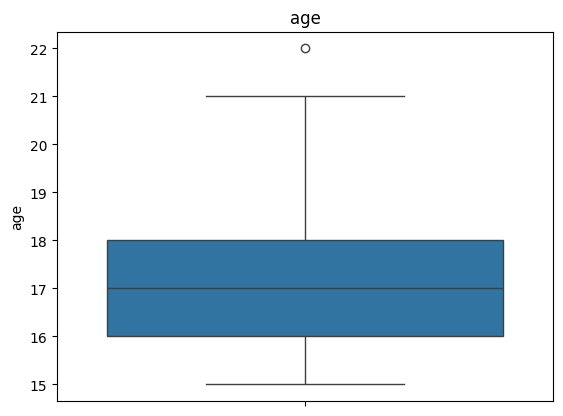

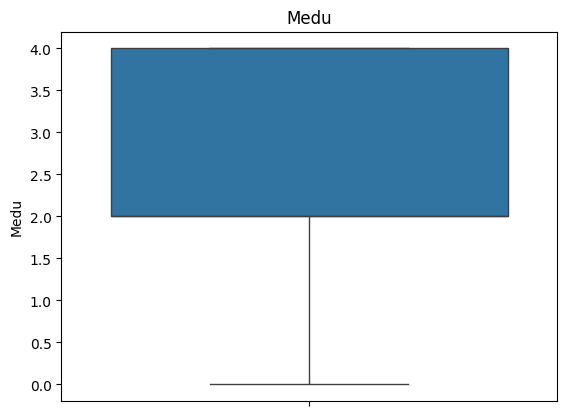

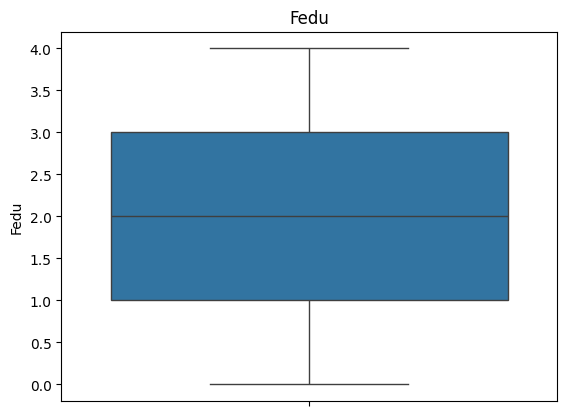

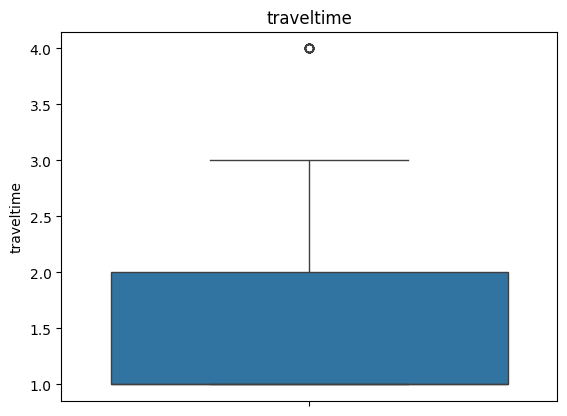

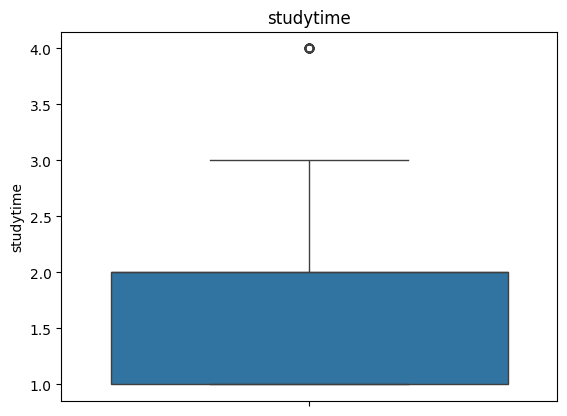

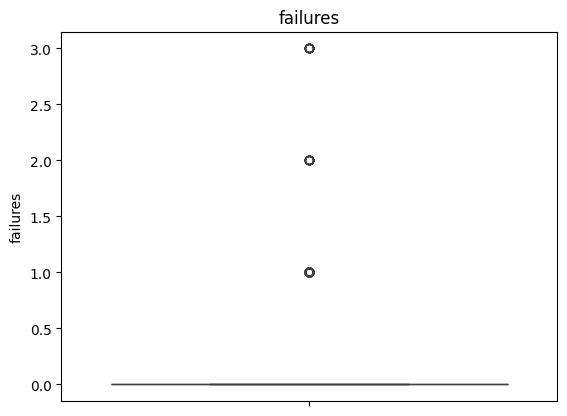

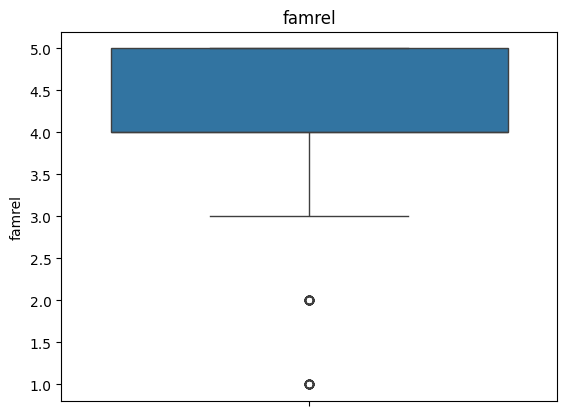

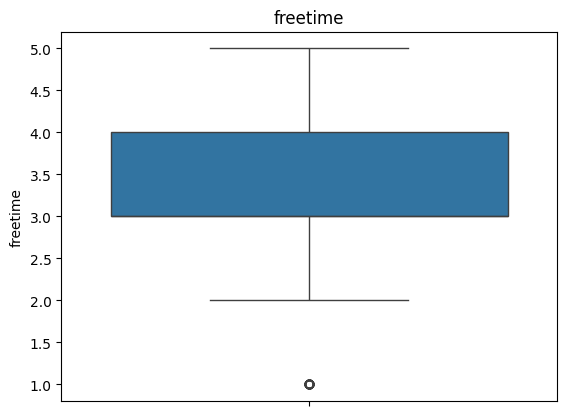

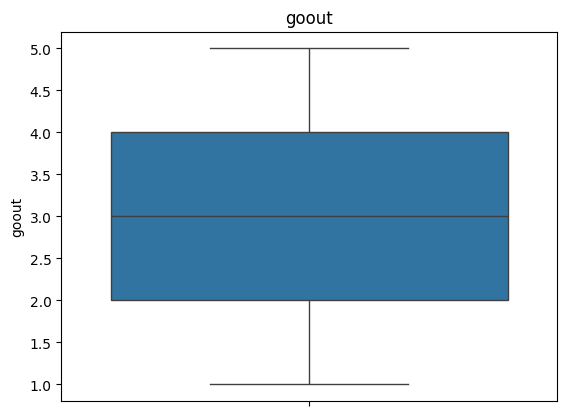

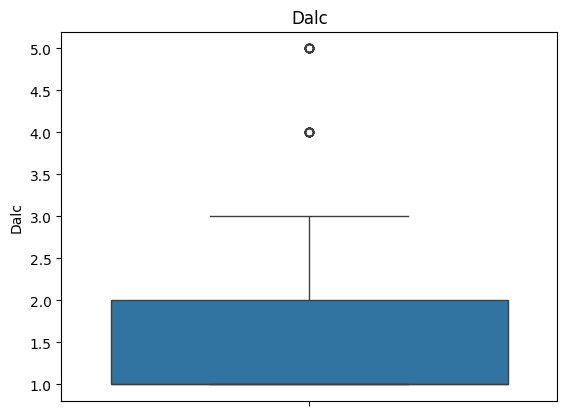

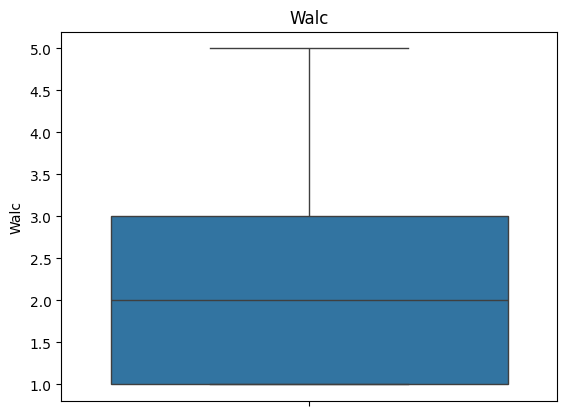

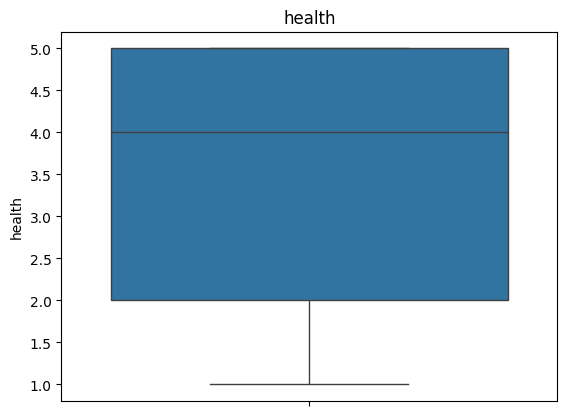

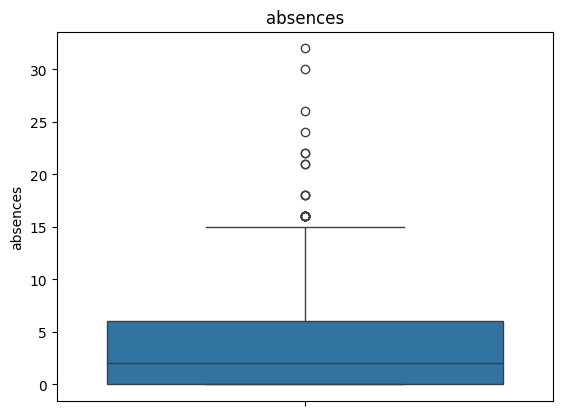

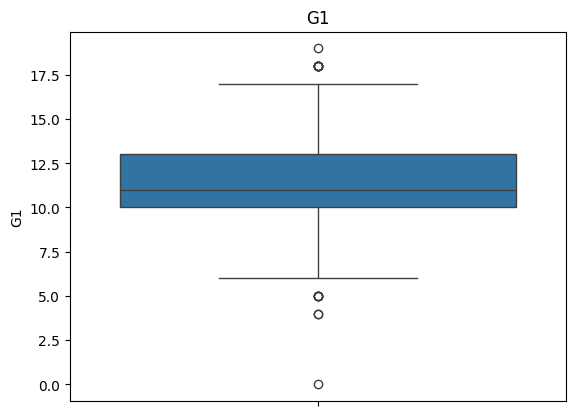

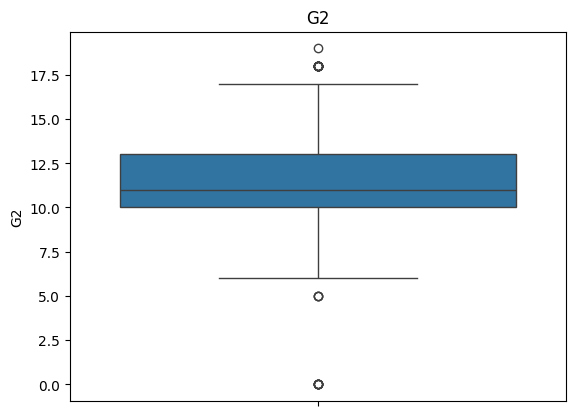

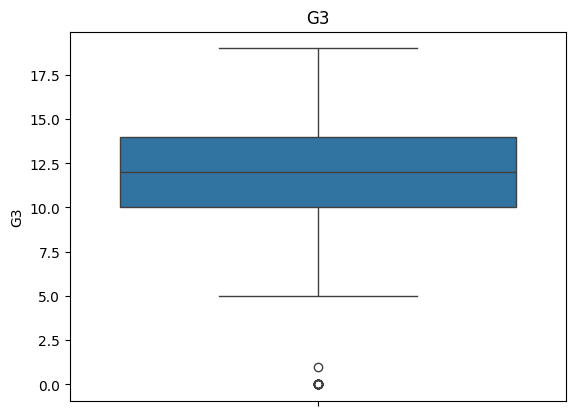

In [20]:
for i in num_cols:
    plt.title(i)
    sns.boxplot(df[i])
    plt.show()

In [21]:
out_cols=["age","traveltime","studytime","famrel","freetime","Dalc","absences","G1","G2","G3"]

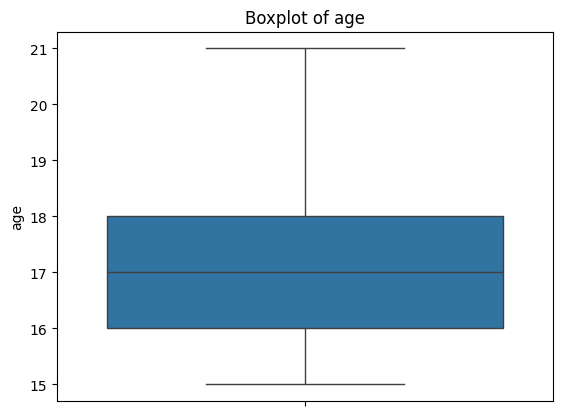

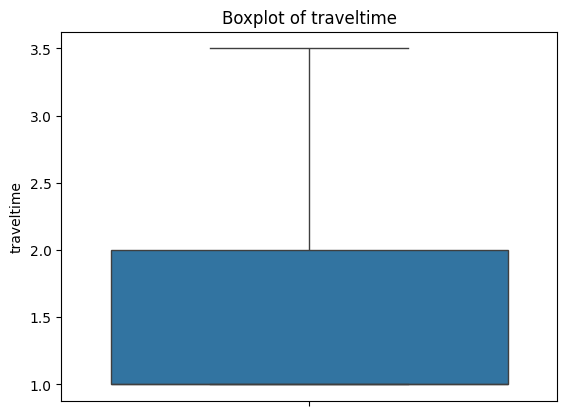

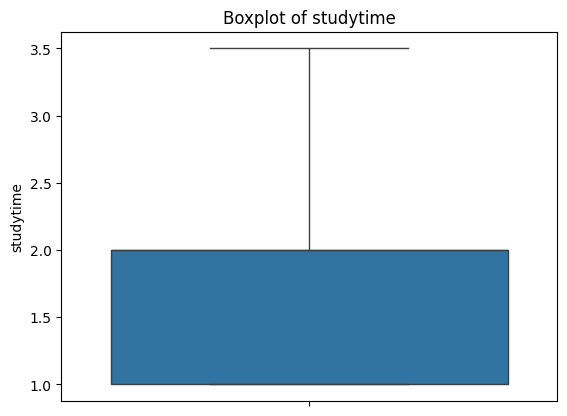

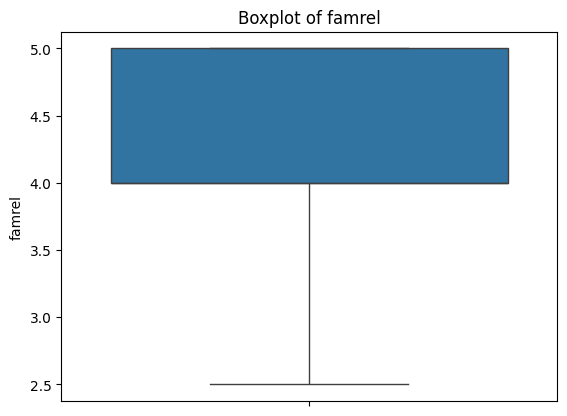

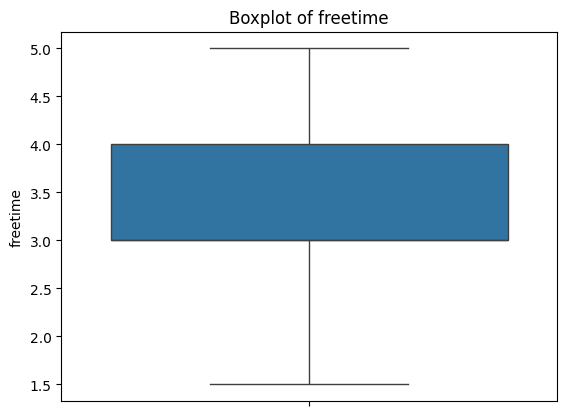

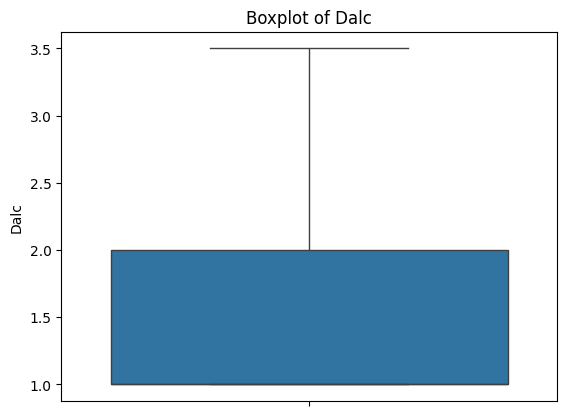

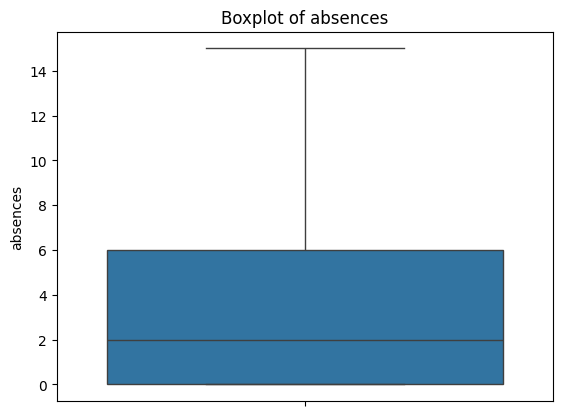

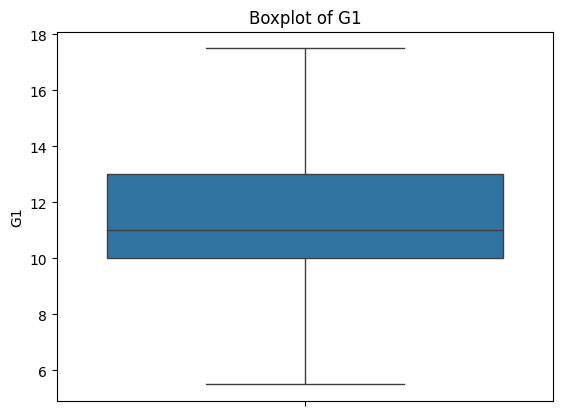

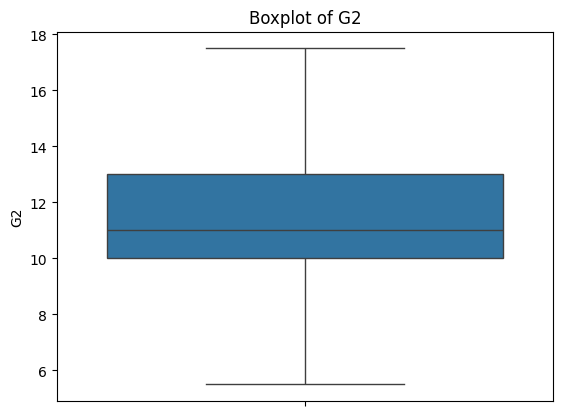

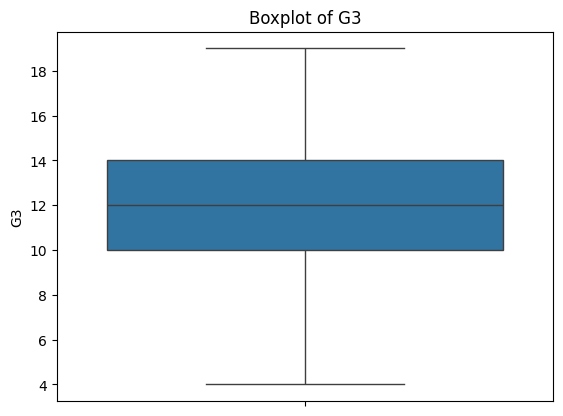

In [22]:
for col in out_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower, upper)  
    sns.boxplot(y=df[col]) 
    plt.title(f'Boxplot of {col}')
    plt.show() 

# Group by :

In [24]:
df.groupby("school")["G3"].mean()

school
GP    12.593381
MS    10.898230
Name: G3, dtype: float64

## Insight :
### Students from the “GP” school perform better on average than those from “MS” school, based on final grade G3.

# EDA :

# Univariate Analysis :

## Distribution of Final Grades (G3) :

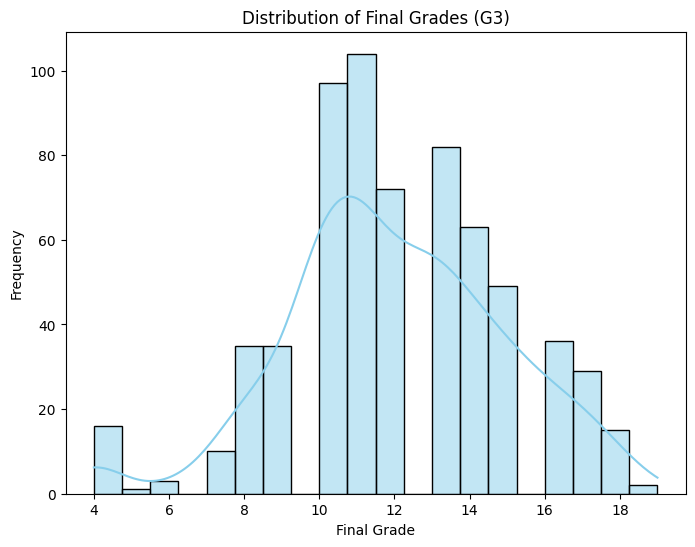

In [29]:
plt.figure(figsize=(8, 6))
sns.histplot(df['G3'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade')
plt.ylabel('Frequency')
plt.show()

## Insight:

### The final grades (G3) are approximately normally distributed, with a slight skew towards higher grades. Most students score between 10 and 15.

# Ratio of Students’ Addresses: Urban vs Rural

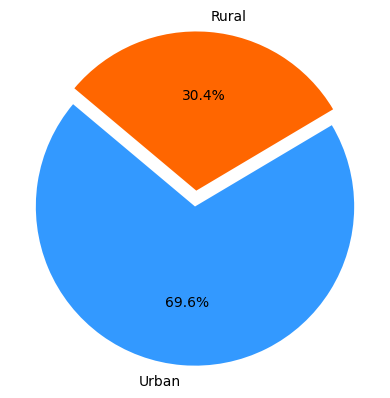

In [32]:
# Calculate percentage values
total = len(df)
value_counts = df['address'].value_counts()
percentages = value_counts / total * 100

# Define custom colors for each part
colors = ['#3399ff', '#ff6600']

# Define the amount of space between the parts
explode = (0.1, 0)

# Define custom labels for the parts
custom_labels = ['Urban', 'Rural']

# Create a pie chart
plt.figure(figsize=(4, 4))  # Adjust the figure size if needed
plt.pie(
    percentages,
    labels=custom_labels,
    autopct=lambda p: f'{p:.1f}%',
    startangle=140,
    colors=colors,  # Use custom colors
    explode=explode,  # Add space between parts
)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show the plot
plt.tight_layout()
plt.show()


## Insight:
### The majority of students come from urban areas, with a smaller proportion from rural areas.

## Study Time Distribution

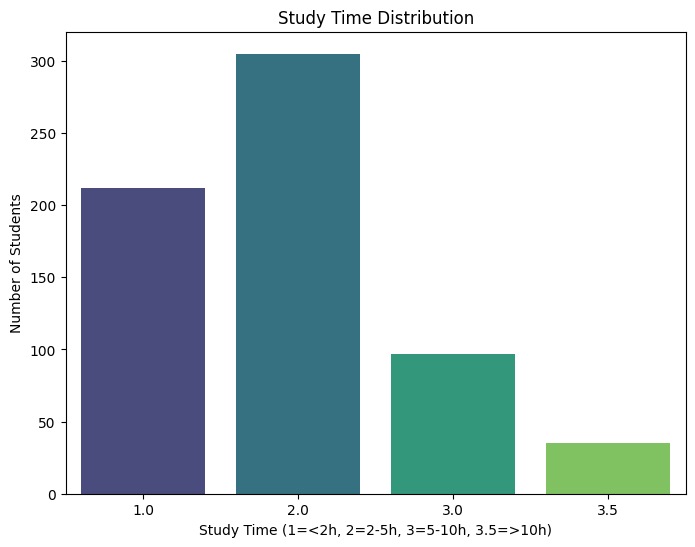

In [35]:
plt.figure(figsize=(8, 6))
sns.countplot(x='studytime', data=df, palette='viridis')
plt.title('Study Time Distribution')
plt.xlabel('Study Time (1=<2h, 2=2-5h, 3=5-10h, 3.5=>10h)')
plt.ylabel('Number of Students')
plt.show()

## Insight: 

### The majority of students dedicate between 2 to 5 hours weekly to study, indicating moderate study habits.

# Student Age Distribution :

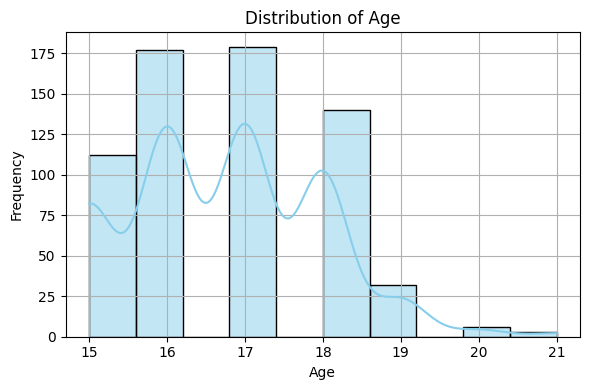

In [38]:
plt.figure(figsize=(6, 4))
sns.histplot(df['age'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

## Insight :
### The distribution is slightly left-skewed,The histogram shows that most students fall within the age range of 15 to 18 years, with a peak around 16 and 17 years.

# Distribution of Student Absences :

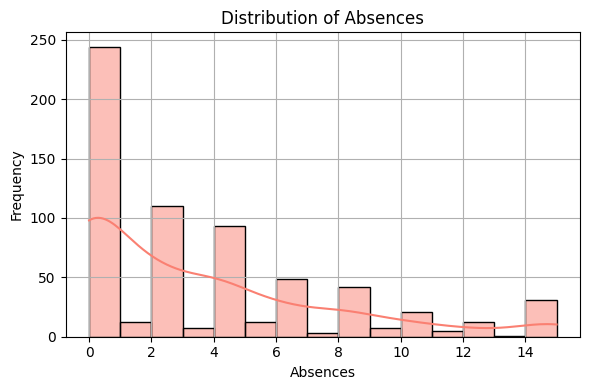

In [41]:
plt.figure(figsize=(6, 4))
sns.histplot(df['absences'], bins=15, kde=True, color='salmon')
plt.title('Distribution of Absences')
plt.xlabel('Absences')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

## Insight :
### The distribution of absences is right-skewed, with the majority of students having fewer than 10 absences

# Count of students by school

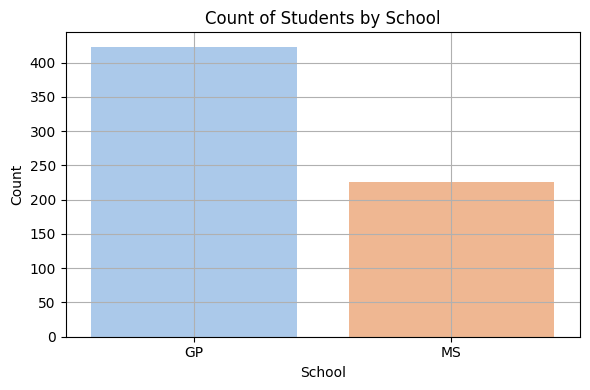

In [44]:
plt.figure(figsize=(6, 4))
sns.countplot(x='school', data=df, palette='pastel')
plt.title('Count of Students by School')
plt.xlabel('School')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

## Insight :
### Plot shows that more students belong to one school GP than the MS

# Parent's Cohabitation Status

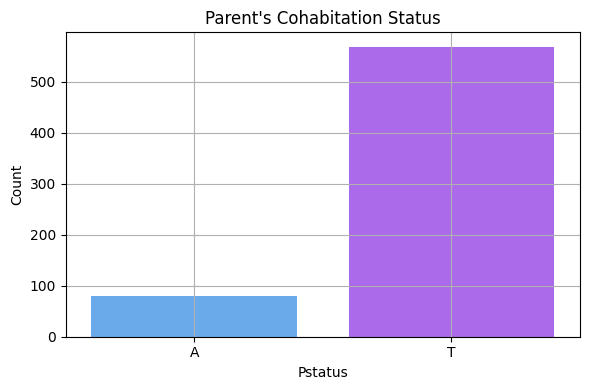

In [47]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Pstatus', data=df, palette='cool')
plt.title("Parent's Cohabitation Status")
plt.xlabel('Pstatus')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

## Insight :
### The plot reveals that the majority of students have parents who are living together (‘T’), while a smaller portion have parents who are living apart (‘A’). 

# Gender Distribution :

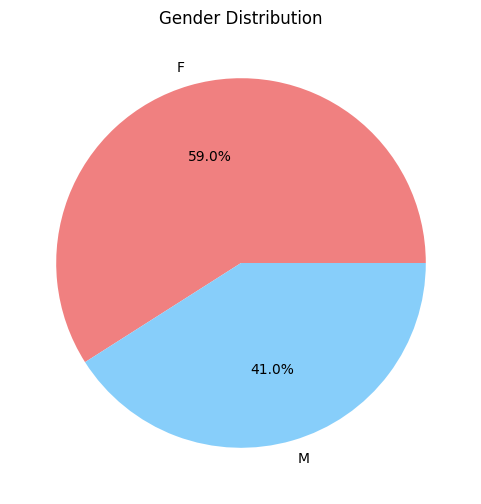

In [50]:
plt.figure(figsize=(6, 6))
df['sex'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

## Insight: 

### The dataset has a slightly higher proportion of female students compared to male students


 # Bivariate Analysis :

## Study Time vs. Final Grade

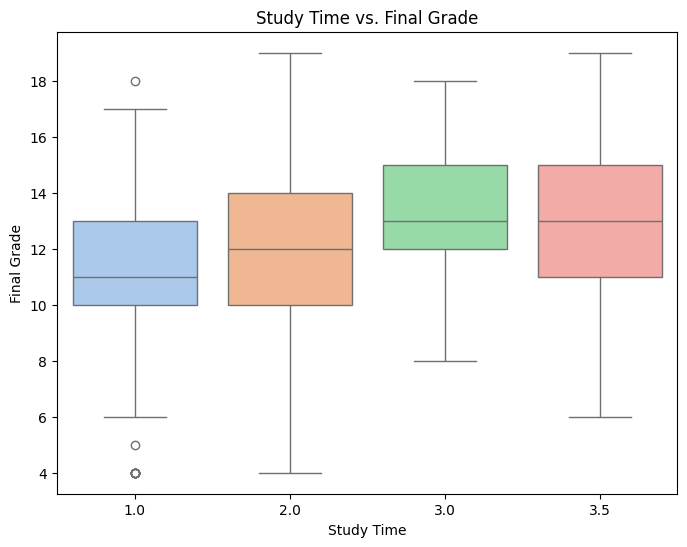

In [54]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='studytime', y='G3', data=df, palette='pastel')
plt.title('Study Time vs. Final Grade')
plt.xlabel('Study Time')
plt.ylabel('Final Grade')
plt.show()

## Insight: 
### Students who invest more time in studying tend to achieve higher final grades, highlighting the positive impact of dedicated study time.

# Comparison of Final Grades by School and Gender

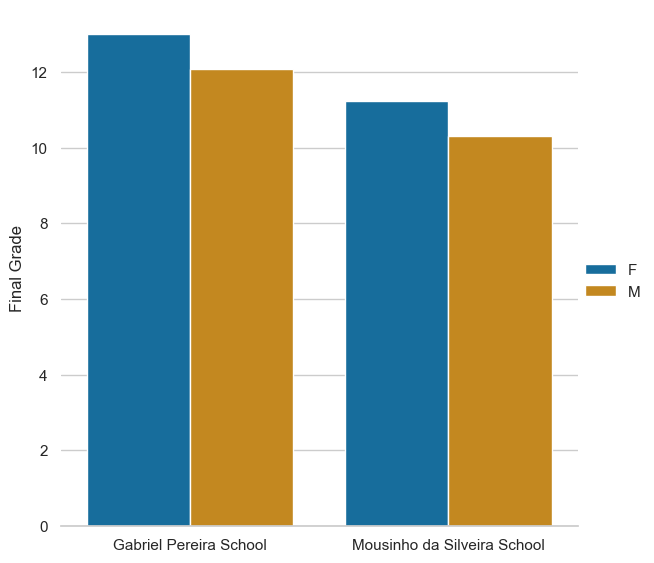

In [57]:
# Set a custom color palette
custom_palette = sns.color_palette("colorblind")

# Set the Seaborn style with the custom color palette
sns.set_theme(style="whitegrid", palette=custom_palette)

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df, kind="bar",
    x="school", y="G3", hue="sex",
    errorbar="sd", height=6, ci=None
)
g.despine(left=True)
new_x_labels = ["Gabriel Pereira School", "Mousinho da Silveira School"]  # Modify these labels as needed
plt.xticks(range(len(new_x_labels)), new_x_labels)

g.set_axis_labels("", "Final Grade")

g.legend.set_title("")


## Insight :
### At Gabriel Pereira School, female students have the highest average final grades compared to all other groups.

# Weekend Alcohol consumption v/s Final grade

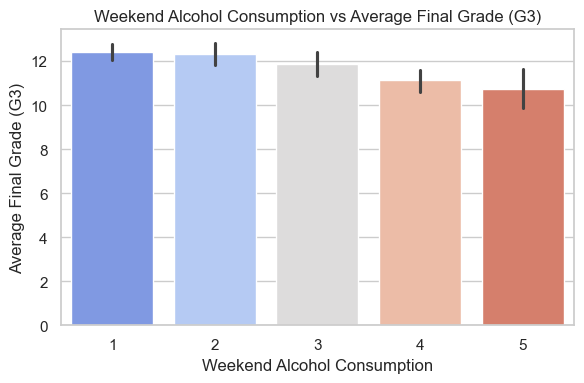

In [60]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Walc', y='G3', data=df, palette='coolwarm')
plt.title('Weekend Alcohol Consumption vs Average Final Grade (G3)')
plt.xlabel('Weekend Alcohol Consumption')
plt.ylabel('Average Final Grade (G3)')
plt.tight_layout()

plt.show()

## Insight :
### The bar plot indicates that students with lower levels of weekend alcohol consumption tend to achieve higher final grades.

# Impact of Internet access on Final Grades

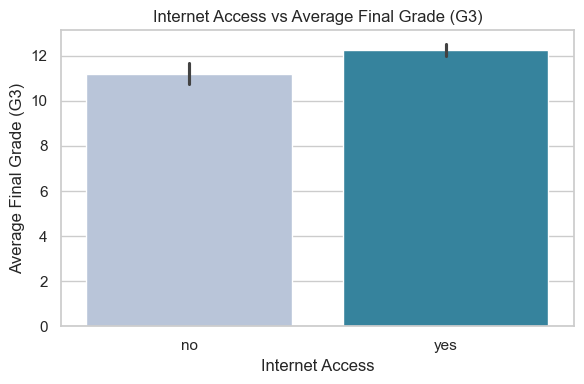

In [63]:
plt.figure(figsize=(6, 4))
sns.barplot(x='internet', y='G3', data=df, palette='PuBuGn')
plt.title('Internet Access vs Average Final Grade (G3)')
plt.xlabel('Internet Access')
plt.ylabel('Average Final Grade (G3)')
plt.tight_layout()
plt.show()

## Insight:
### Students with internet access tend to have higher average final grades compared to those without internet access. This suggests that internet access may play a role in improving academic performance, possibly due to better access to resources, study materials, or learning opportunities online.

# School Type vs Aspiration for Higher Education

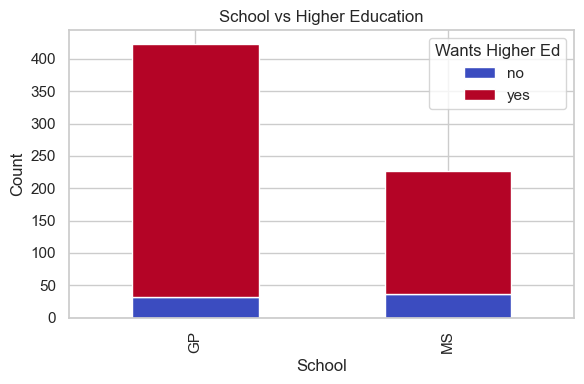

In [66]:
pd.crosstab(df['school'], df['higher']).plot(kind='bar', stacked=True, figsize=(6,4), colormap='coolwarm')
plt.title('School vs Higher Education')
plt.xlabel('School')
plt.ylabel('Count')
plt.legend(title='Wants Higher Ed')
plt.tight_layout()
plt.show()

## Insight :
### The plot shows that the number of students from the GP school is higher compared to the MS school. Among GP students, a large majority want higher education, while only a few do not want it.

## Parental Education vs. Final Grade

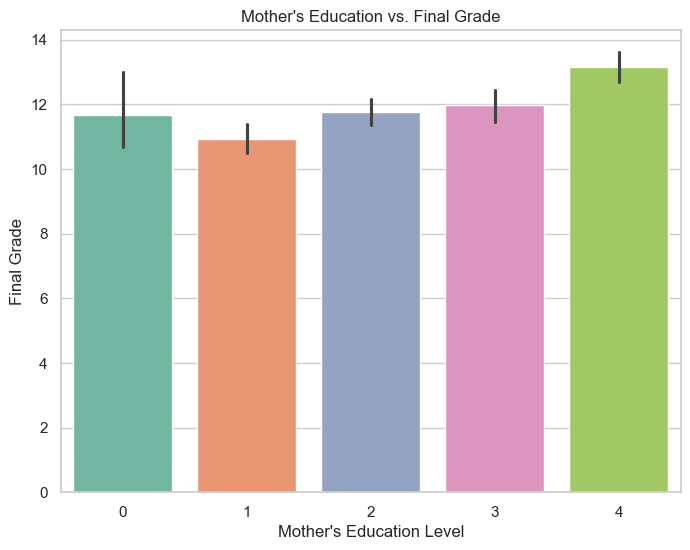

In [69]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Medu', y='G3', data=df, palette='Set2')
plt.title("Mother's Education vs. Final Grade")
plt.xlabel("Mother's Education Level")
plt.ylabel('Final Grade')
plt.show()

## Insight: 

### A higher level of maternal education correlates with better student performance, suggesting the influence of parental educational background.

## Absences vs. Final Grade

In [72]:
data=df.sample(50)

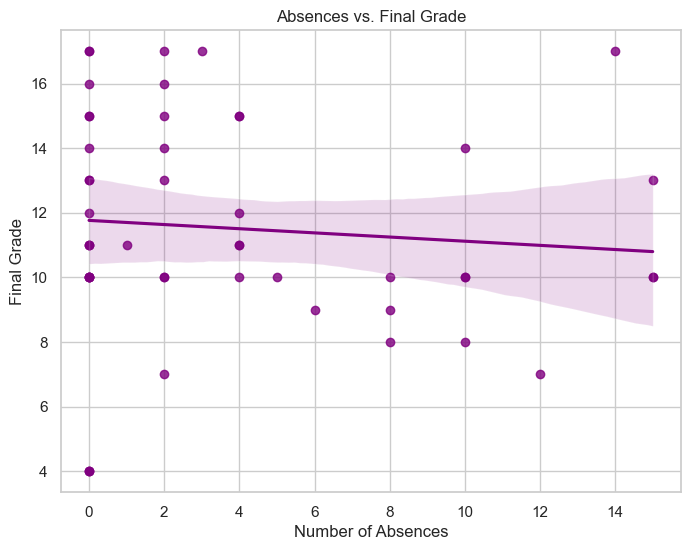

In [73]:
plt.figure(figsize=(8, 6))
sns.regplot(x='absences', y='G3', data=data, color='purple', scatter=True)
plt.title('Absences vs. Final Grade')
plt.xlabel('Number of Absences')
plt.ylabel('Final Grade')
plt.show()

## Insight:
### The plot suggests a weak negative correlation between student absences and final grades , An increase in absences is generally associated with lower final grades, emphasizing the importance of regular attendance.

# Multivariate Analysis :

## Correlation Heatmap 

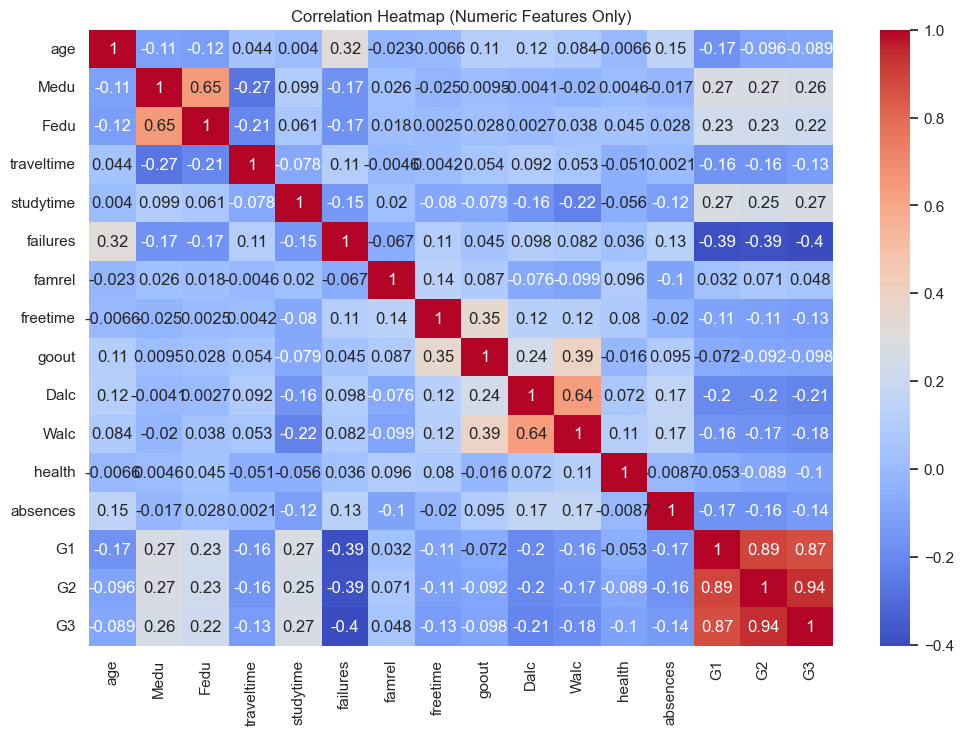

In [77]:
# Only include numeric columns for correlation
numeric_data = df.select_dtypes(include=['number'])

# Compute and plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Features Only)')
plt.show()

## Insight :

### The heatmap reveals that G2 (second period grade) and G1 (first period grade) show the strongest positive correlations with the final grade (G3). 

## Pair Plot of Selected Feature

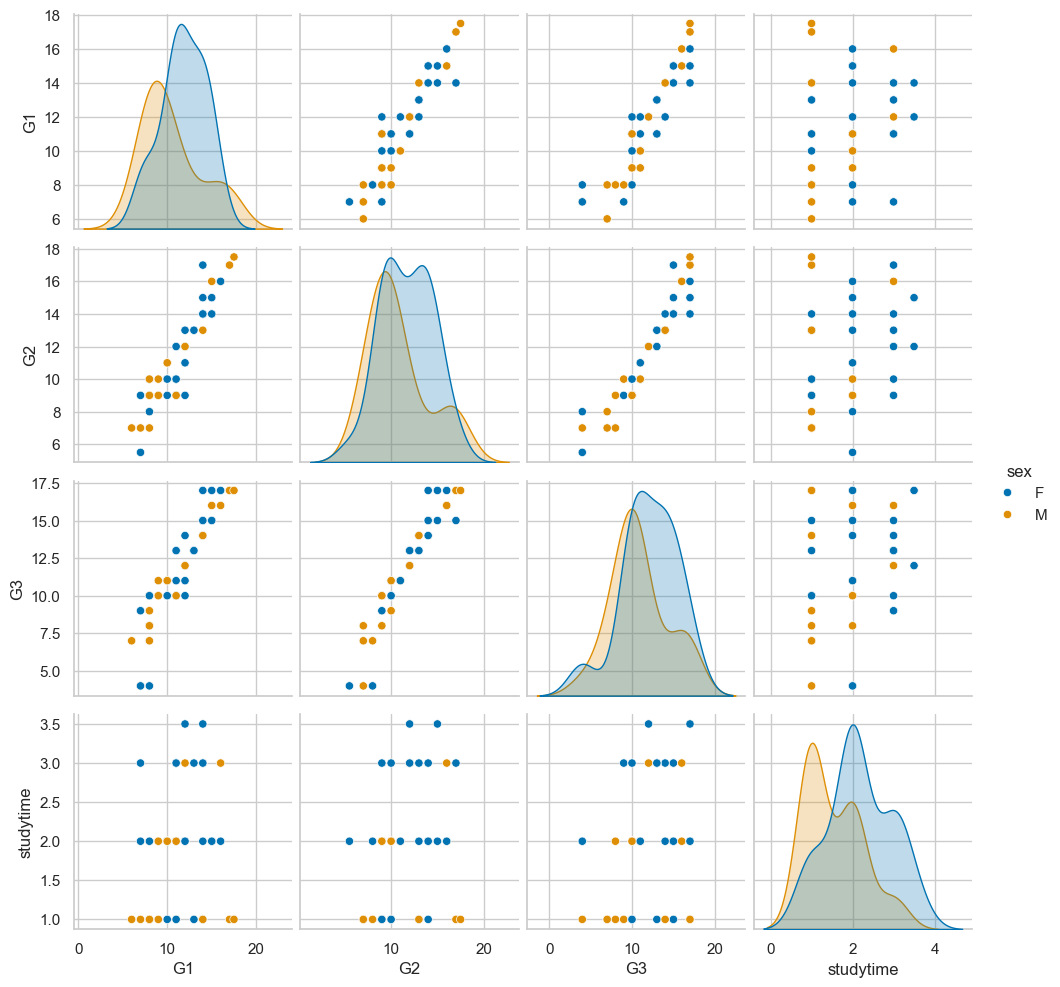

In [80]:
# Check for 'sex' column before plotting
if 'sex' in data.columns:
    sns.pairplot(data, vars=['G1', 'G2', 'G3','studytime'], hue='sex')
    plt.show()
else:
    print("Column 'sex' not found in the DataFrame!")

## Insight: 

### G1, G2, and G3 are strongly positively correlated, indicating consistent academic performance across terms. Female students generally show slightly higher study times and better grades.

# Encoding :

In [83]:
data = pd.get_dummies(df, drop_first=True)

In [152]:
data

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2.0,2.0,0,4.0,3.0,4,1.0,...,True,False,True,False,False,False,True,True,False,False
1,17,1,1,1.0,2.0,0,5.0,3.0,3,1.0,...,False,False,False,True,False,False,False,True,True,False
2,15,1,1,1.0,2.0,0,4.0,3.0,2,2.0,...,True,False,True,False,False,False,True,True,True,False
3,15,4,2,1.0,3.0,0,3.0,2.0,2,1.0,...,True,False,False,True,False,True,True,True,True,True
4,16,3,3,1.0,2.0,0,4.0,3.0,2,1.0,...,False,False,False,True,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1.0,3.0,1,5.0,4.0,2,1.0,...,True,False,False,False,False,True,False,True,True,False
645,18,3,1,1.0,2.0,0,4.0,3.0,4,1.0,...,True,False,False,True,False,False,True,True,True,False
646,18,1,1,2.0,2.0,0,2.5,1.5,1,1.0,...,True,False,False,False,False,True,True,True,False,False
647,17,3,1,2.0,1.0,0,2.5,4.0,5,3.0,...,True,False,False,False,False,False,False,True,True,False


# Features and Target

In [85]:
X = data.drop("G3", axis=1)
y = data["G3"]

# Scaling

## MinMax Scaling :

In [87]:
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [154]:
X_scaled

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,0.500000,1.00,1.00,0.4,0.4,0.000000,0.6,0.428571,0.75,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.333333,0.25,0.25,0.0,0.4,0.000000,1.0,0.428571,0.50,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.000000,0.25,0.25,0.0,0.4,0.000000,0.6,0.428571,0.25,0.4,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.000000,1.00,0.50,0.0,0.8,0.000000,0.2,0.142857,0.25,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
4,0.166667,0.75,0.75,0.0,0.4,0.000000,0.6,0.428571,0.25,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0.666667,0.50,0.75,0.0,0.8,0.333333,1.0,0.714286,0.25,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
645,0.500000,0.75,0.25,0.0,0.4,0.000000,0.6,0.428571,0.75,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
646,0.500000,0.25,0.25,0.4,0.4,0.000000,0.0,0.000000,0.00,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
647,0.333333,0.75,0.25,0.4,0.0,0.000000,0.0,0.714286,1.00,0.8,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


# Train-Test Split :

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Regression Models

In [92]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "LightGBM": LGBMRegressor(verbose=-1),
    "CatBoost": CatBoostRegressor(verbose=0)
}

# Evaluate All Models

In [94]:
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results.append([name, round(mae, 2), round(mse, 2), round(rmse, 2), round(r2, 2)])

# Display Table

In [96]:
# Create DataFrame with MAE, MSE, RMSE, R²
results_df = pd.DataFrame(results, columns=["Model", "MAE", "MSE", "RMSE", "R²"])
results_df = results_df.sort_values(by="R²", ascending=False).reset_index(drop=True)

# Display the DataFrame
results_df

,Model,MAE,MSE,RMSE,R²
0,Decision Tree,0.00,0.00,0.00,1.00
1,XGBoost,0.01,0.00,0.01,1.00
2,CatBoost,0.13,0.03,0.17,1.00
3,Random Forest,0.28,0.16,0.40,0.98
4,LightGBM,0.28,0.16,0.41,0.98
5,Gradient Boosting,0.50,0.43,0.66,0.95
6,Linear Regression,0.69,0.91,0.95,0.89
7,Ridge Regression,0.69,0.92,0.96,0.89


# Model Performance :

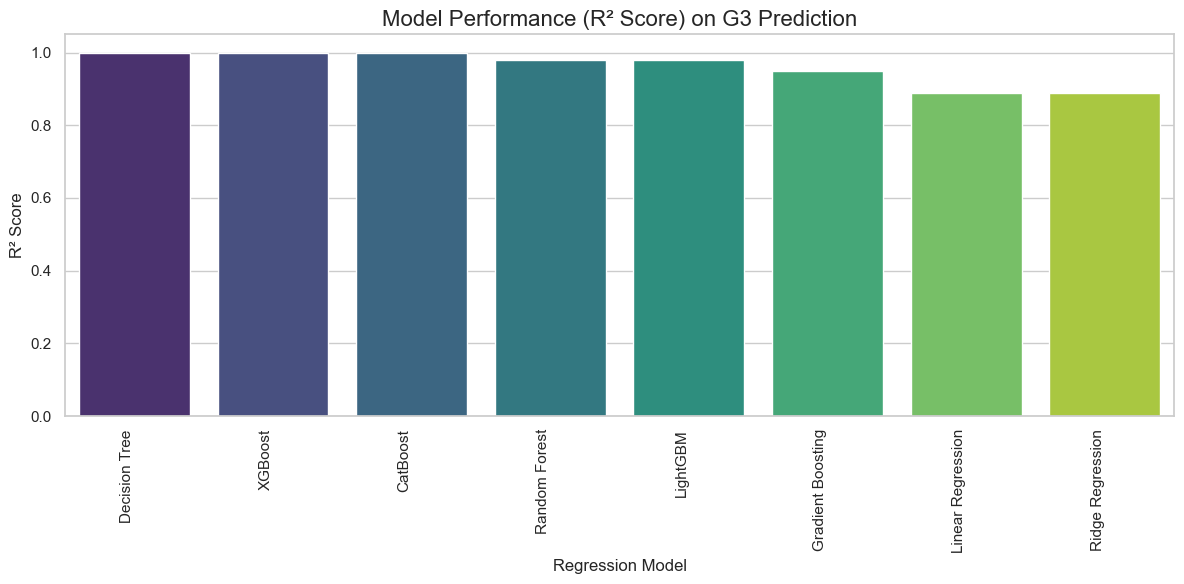

In [98]:
# Set plot style
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x="Model", y="R²", palette="viridis")

# Rotate x labels
plt.xticks(rotation=90, ha='right')

# Add labels and title
plt.title("Model Performance (R² Score) on G3 Prediction", fontsize=16)
plt.xlabel("Regression Model")
plt.ylabel("R² Score")
plt.ylim(0, 1.05)

# Show plot
plt.tight_layout()
plt.show()

### Here, Decision Tree is the best model

# Feature Importance of Decision Tree model :

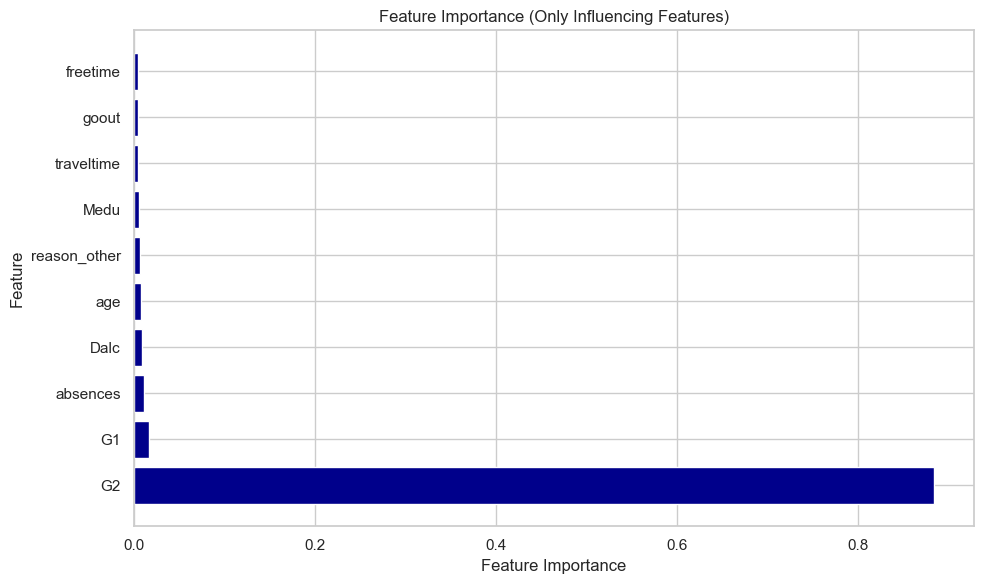

In [101]:
# Train the Decision Tree Regressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Get feature importances
feature_importance = dt_model.feature_importances_
feature_names = X_train.columns

# Create full DataFrame of all features
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Create a filtered DataFrame for plotting only influencing features
plot_df = feature_importance_df[feature_importance_df['Importance'] > 0]
plot_df = plot_df.sort_values(by='Importance', ascending=False).head(10)

# Plot only influencing features
plt.figure(figsize=(10, 6))
plt.barh(plot_df['Feature'], plot_df['Importance'],color="darkblue")
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Only Influencing Features)')
plt.tight_layout()
plt.show()

### The feature G2 (Second Period Grade) has the highest importance score in predicting the final student performance (G3). This indicates a strong linear relationship between the second period’s academic performance and the final grade.

# <center> CONCLUSION :

* This project successfully implemented a complete machine learning workflow to build a predictive model using a Decision Tree Regressor. Starting with Exploratory Data Analysis (EDA), we gained valuable insights into data patterns, identified outliers, and understood feature distributions.

* To prepare the data, categorical features were encoded, and Min-Max Scaling was applied to normalize numerical values. This ensured all features contributed proportionally during model training. The dataset was then split into training and testing sets, allowing for accurate model evaluation on unseen data.

* We trained a Decision Tree Regressor, and its performance was assessed using standard regression metrics. The model demonstrated strong predictive capability and interpretability.

* Finally, we analyzed the feature importance from the trained Decision Tree model. This revealed which features most significantly influenced predictions, offering clear insights into the underlying drivers of the target variable.

* In summary, this pipeline—from data exploration to feature importance—ensured a reliable, interpretable, and effective machine learning model.

* From the exploratory data analysis, it is evident that several factors influence students’ final grades (G3). Notably, higher weekend alcohol consumption and increased absences are both associated with lower academic performance. These findings highlight the importance of consistent attendance and healthy lifestyle choices in supporting better educational outcomes.